In [1]:
# Import the neccessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import scipy.stats as stats

from sklearn.dummy import DummyRegressor


# Preprocessing


1. Create a Binary columns for categorical features using pandas get_dummies()
2. Split the dataset into train and test sets
3. standard scaling to the train  dataset
4. Plot and overview the distribution between training and test data points
5. define functions and check outcome with sklearn librarys such as  mae, mse, and R_squared functions
5. Start modeling with dummyRegressor function as a baseline score and compare with linear regression


In [2]:
# Downlaod the data
df = pd.read_csv('cleaned vehicles data_eda.csv')
df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,...,type,paint_color,price_kbb,mpg,rating,year_kbb,year_difference,new_price,depreciation,depreciation per year
0,8995.0,2011,chevrolet,traverse,good,6,gas,178054.0,clean,automatic,...,SUV,white,30995.0,Low mpg (20 - 30),4.3,2021,10,25426.696,0.646238,0.098696
1,10995.0,2014,ford,explorer,good,6,gas,170259.0,clean,automatic,...,SUV,white,33470.0,Low mpg (20 - 30),4.1,2021,7,29137.649,0.622653,0.129970
2,12984.0,2016,nissan,rogue,excellent,4,gas,86942.0,clean,automatic,...,SUV,blue,26745.0,Low mpg (20 - 30),4.7,2021,5,24223.771,0.463998,0.117259
3,17382.0,2015,nissan,pathfinder,excellent,6,gas,48932.0,rebuilt,automatic,...,SUV,black,33075.0,Low mpg (20 - 30),4.1,2020,5,29957.047,0.419769,0.103149
4,25730.0,2017,ford,explorer,excellent,6,gas,49858.0,rebuilt,automatic,...,SUV,black,33470.0,Low mpg (20 - 30),4.1,2021,4,30921.106,0.167882,0.044906


In [3]:
df.shape

(7917, 22)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7917 entries, 0 to 7916
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  7917 non-null   float64
 1   year                   7917 non-null   int64  
 2   manufacturer           7917 non-null   object 
 3   model                  7917 non-null   object 
 4   condition              7917 non-null   object 
 5   cylinders              7917 non-null   int64  
 6   fuel                   7917 non-null   object 
 7   odometer               7917 non-null   float64
 8   title_status           7917 non-null   object 
 9   transmission           7917 non-null   object 
 10  drive                  7917 non-null   object 
 11  size                   7917 non-null   object 
 12  type                   7917 non-null   object 
 13  paint_color            7917 non-null   object 
 14  price_kbb              7917 non-null   float64
 15  mpg 

In [5]:
#check deprecition per year not to exceed 100%
df['depreciation per year'].max()

0.3410285370256429

In [6]:
df['depreciation per year'].min()

-0.034883758913167195

In [7]:
# negative depreciation per year interpreted the deprecaited value of the car started to recover or retaining the 
# values.

In [8]:
df.shape

(7917, 22)

In [9]:
# Drop model from categorical to minimze the size of binary columns to reduce competition time.
df.drop(columns=['model'],axis=1,inplace=True)

In [10]:
# Revome Redundant Features
df.drop(columns= ['depreciation','price', 'price_kbb', 'year_kbb', 'year',], axis=1, inplace=True)

In [11]:
# Define dummy function to create binary columns
def dummy(df, x):
    df_dummy = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, df_dummy], axis=1)
    df.drop(x, axis=1, inplace=True)
    return df

In [12]:
df = dummy(df, ['manufacturer'])
df = dummy(df, ['drive'])
df = dummy(df, ['type'])
df = dummy(df, ['title_status'])
df = dummy(df, ['paint_color'])
df = dummy(df, ['transmission'])
df = dummy(df, ['condition'])
df = dummy(df, ['fuel'])
df = dummy(df, ['mpg'])
df = dummy(df, ['size'])
df.head()

,cylinders,odometer,rating,year_difference,new_price,depreciation per year,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,...,condition_salvage,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,mpg_Low mpg (20 - 30),mpg_Medium mpg (30 - 40),size_full-size,size_mid-size,size_sub-compact
0,6,178054.0,4.3,10,25426.696,0.098696,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
1,6,170259.0,4.1,7,29137.649,0.129970,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,4,86942.0,4.7,5,24223.771,0.117259,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
3,6,48932.0,4.1,5,29957.047,0.103149,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
4,6,49858.0,4.1,4,30921.106,0.044906,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0


In [13]:
df.shape

(7917, 73)

In [14]:
df.dropna(inplace=True)

# Train  and Test Split

In [15]:
# class the depedent target variable as 
# "y" and the indepedent features as "X"
y = df['depreciation per year']
X = df.drop(columns='depreciation per year', axis=1)

In [16]:
# Split the dataset into train and test using train_test_split 
# imported from sklearn.model_selection
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

In [17]:
X.columns

Index(['cylinders', 'odometer', 'rating', 'year_difference', 'new_price',
       'manufacturer_audi', 'manufacturer_bmw', 'manufacturer_buick',
       'manufacturer_cadillac', 'manufacturer_chevrolet',
       'manufacturer_chrysler', 'manufacturer_dodge', 'manufacturer_fiat',
       'manufacturer_ford', 'manufacturer_honda', 'manufacturer_hyundai',
       'manufacturer_infiniti', 'manufacturer_jaguar', 'manufacturer_kia',
       'manufacturer_lexus', 'manufacturer_lincoln', 'manufacturer_mazda',
       'manufacturer_mitsubishi', 'manufacturer_nissan', 'manufacturer_subaru',
       'manufacturer_volkswagen', 'manufacturer_volvo', 'drive_fwd',
       'drive_rwd', 'type_convertible', 'type_coupe', 'type_hatchback',
       'type_mini-van', 'type_offroad', 'type_other', 'type_pickup',
       'type_sedan', 'type_truck', 'type_van', 'type_wagon',
       'title_status_lien', 'title_status_missing', 'title_status_parts only',
       'title_status_rebuilt', 'title_status_salvage', 'paint_color_b

In [18]:
# Overview the dimension of train and test splitted data.
X_train.shape, X_test.shape

((5541, 72), (2376, 72))

In [19]:
# check the dimension of trains are equal in 'X' an 'y' and the same for test.
y_train.shape, y_test.shape

((5541,), (2376,))

In [20]:
# lets begin by the mean as predicator to start with as best guess
train_mean = y_train.mean()
train_mean

0.11274449265018396

In [21]:
# Dummy regressor return the same value 
dumb_reg = DummyRegressor(strategy='mean')
dumb_reg.fit(X_train, y_train)
dumb_reg.constant_

array([[0.11274449]])

In [22]:
# The score of variance explained begin with 0.11274 

In [23]:
# Function defination for the proportion of variance explaining or R_squared 
def r_squared(y, ypred):
    """R-squared score.  
    Calculate the R-squared, or coefficient of determination, of the input.    
    Arguments:
    y -- the observed values
    ypred -- the predicted values
    """
    ybar = np.sum(y) / len(y) # yes, we could use np.mean(y)
    SST = np.sum((y - ybar)**2) #(total sum of squares error or SST
    #variance within the dataset from the mean).
    SSR = np.sum((y - ypred)**2) #(residual sum of squares error.
    # The variance of the expected and the predicted where, aiming to minimize the 
    # errors as possible).
    r2 = (SST - SSR) / SST
    return r2

In [24]:
# Broadcasting train_mean by multiplying ones vector instantiated by y_train dimension
y_tr_pred = train_mean * np.ones(len(y_train))
#overviw the output of the predicted but a number multiply by one is itself.
y_tr_pred[:5]

array([0.11274449, 0.11274449, 0.11274449, 0.11274449, 0.11274449])

In [25]:
# The same result achieved using dummyregressor predict.
y_tr_pred = dumb_reg.predict(X_train)
y_tr_pred[:5]

array([0.11274449, 0.11274449, 0.11274449, 0.11274449, 0.11274449])

In [26]:
# Repreat for y_test multiply an array of once with a lenght of y
y_te_pred = train_mean * np.ones(len(y_test))
#print(y_test, y_te_pred[:2])

In [27]:
#Calculate the Mean absolute errors(mae) as defined above
def mae(y, ypred):
    """Mean absolute error.
    Calculate the mean absolute error of the arguments
    Arguments:
    y -- the observed values
    ypred -- the predicted values
    """
    abs_error = np.abs(y - ypred)#The difference of expected and predicted
    mae = np.mean(abs_error)# averaging the total erros
    return mae

In [28]:
#Calculate the MSE as defined above
def mse(y, ypred):
    """Mean square error.
    Calculate the mean square error of the arguments
    Arguments:
    y -- the observed values
    ypred -- the predicted values
    """
    sq_error = (y - ypred)**2  # Square errors or residual errors
    mse = np.mean(sq_error) # mean square errors
    return mse

In [29]:
# RMSE (root-mean-sequared error) on test dataset.
np.sqrt(mse(y_test, y_te_pred))

0.04886914473289671

In [30]:
# MAE (mean-absolute error) on test dataset
mae(y_test, y_te_pred)

0.03559019753976195

The loss from 'RMSE' square the value before it is a square root that tends higher variability than 'MAE' 


**USING SKLEARN LIBRARY -  r2_score**

In [31]:
# R^2 from the function defination
r_squared(y_train, y_tr_pred), r_squared(y_test, y_te_pred)

(0.0, -0.0012742252826999142)

In [32]:
# Sklearn library r2_score
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.0, -0.0012742252826998257)

The scores from sklearn r2_score and from the function defination r_squared is concurred. 

In [33]:
# Using sklearn libarary mean_squard_error in training and test dataset score is conccured with functions.
mean_absolute_error(y_train, y_tr_pred),  np.sqrt(mean_squared_error(y_test, y_te_pred))

(0.036309891351495184, 0.04886914473289667)

In [34]:
# The function mse, and mae return almost the same result with sklearn mean_absolute_error and root_mean_squared
# error

# Scale the data 

In [35]:
# Scale and transform the data 
scaler = StandardScaler()
scaler.fit(X_train)
X_tr_scaled = scaler.transform(X_train)
X_te_scaled = scaler.transform(X_test)

In [36]:
# Apply linearRegression model and fit the X_tr_scaled.
lm = LinearRegression()
lm.fit(X_tr_scaled, y_train)

LinearRegression()

In [37]:
# Make perdictions using the model on both train and test splits 
y_tr_pred = lm.predict(X_tr_scaled)
y_te_pred = lm.predict(X_te_scaled)

In [38]:
# Assess Model Performance
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.43331027326331506, 0.43293096994926483)

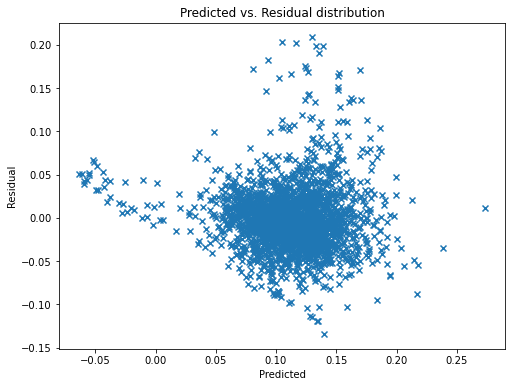

In [39]:
plt.figure(figsize=(8,6))
#plt.scatter(y_train, y_tr_pred, color='gray', marker="D")
plt.scatter(y_te_pred, y_test - y_te_pred, marker='x')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.title('Predicted vs. Residual distribution')
plt.show()

The residual distribution against the predicted values seems no correlation between the two
parameters, because error distribution should be independent and uncorrelated.
 


In [40]:
# The score from linear regession yet not satisfactor hence, test the datasets into various modeling algorithms 
# to choose which moldes perform better in predictig the target variable.

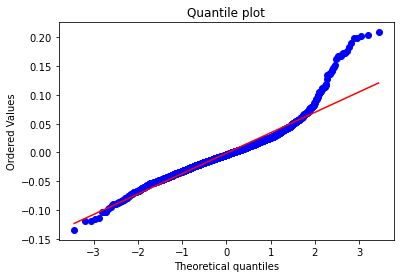

In [41]:
# Residual distribution
residual = y_test - y_te_pred
stats.probplot(residual, plot=plt)
plt.title("Quantile plot")
plt.show()

The plot shows there is litttle deviation on top right spot, the rest part is normally distribution.

In [ ]:
# Overview the result mean absolute error after the training set scale. The result show the loss drop
# significantly.
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

From the graph and the result, there is no such difference in mean absolute errors between the training and test datasets, that is there is no sign of overfitting on the training dataset.


In [43]:
# Squared mean error has shown also similar result as absoulte mean error. Scaling is the training dataset 
# improves the model performance
np.sqrt(mean_squared_error(y_train, y_tr_pred)), np.sqrt(mean_squared_error(y_test, y_te_pred))

(0.037437859643890486, 0.036776990259292514)

Generally, scaling the training dataset minimize the loss significantly.

In [44]:
df.to_csv('cleaned vehicles data_prep.csv', index=None)